<h3>Exploração dos Dados</h3>

In [1]:
from Neuraline.Utilities.data import DataTable, DataExploration
from Neuraline.Utilities.chart import Chart
data_table, data_exploration, chart = DataTable(), DataExploration(), Chart()
url_path = './Bitcoin Dados Históricos - Investing.com.csv'
data_table.visualization_csv_inline(url_path=url_path, limit=10)

╒══════════╤══════════╤════════════╤══════════╤══════════╤═════════╤═════════╕
│    ﻿Data │   Último │   Abertura │   Máxima │   Mínima │ Vol     │ Var%    │
╞══════════╪══════════╪════════════╪══════════╪══════════╪═════════╪═════════╡
│ 21082022 │  21322.6 │    21138.9 │  21469.9 │  21077.4 │ 189.63K │ 0.87%   │
├──────────┼──────────┼────────────┼──────────┼──────────┼─────────┼─────────┤
│ 20082022 │  21138.9 │    20830.7 │  21357.4 │  20784.8 │ 206.94K │ 1.48%   │
├──────────┼──────────┼────────────┼──────────┼──────────┼─────────┼─────────┤
│ 19082022 │  20831.3 │    23201.6 │  23202.3 │  20807.8 │ 339.47K │ -10.22% │
├──────────┼──────────┼────────────┼──────────┼──────────┼─────────┼─────────┤
│ 18082022 │  23203.6 │    23337.7 │  23578   │  23131.3 │ 160.97K │ -0.58%  │
├──────────┼──────────┼────────────┼──────────┼──────────┼─────────┼─────────┤
│ 17082022 │  23338   │    23855.8 │  24423.5 │  23191.6 │ 239.53K │ -2.17%  │
├──────────┼──────────┼────────────┼──────────┼─────

True

<h3>Separação em Treinamento e Teste</h3>

In [2]:
y_training, _, y_test, _ = data_exploration.dataSeparationCSV(url_path=url_path, list_inputs=['Máxima'], training_percentage=.5, test_percentage=.5)
print(f'y_training: {len(y_training)} - y_test: {len(y_test)}')

y_training: 116 - y_test: 116


<h3>Visualização dos Dados de Treinamento</h3>

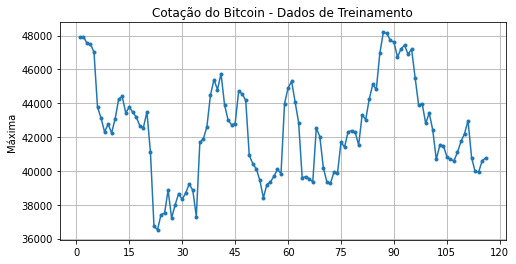

In [4]:
chart.plotLINE(y=y_training, y_label='Máxima', title='Cotação do Bitcoin - Dados de Treinamento')

<h3>Visualização dos Dados de Teste</h3>

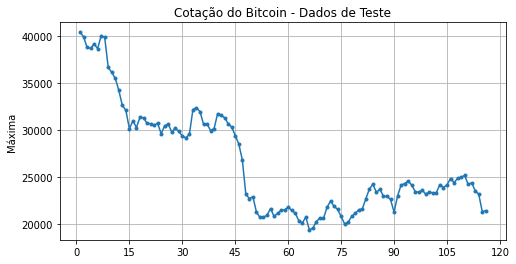

In [5]:
chart.plotLINE(y=y_test, y_label='Máxima', title='Cotação do Bitcoin - Dados de Teste')

<h3>ARIMA</h3>

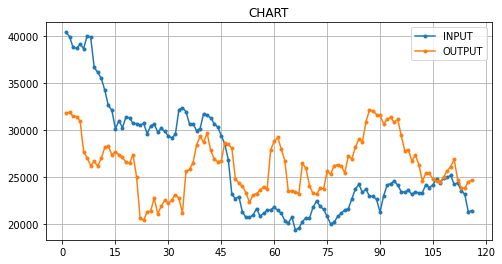

In [7]:
from Neuraline.ArtificialIntelligence.MachineLearning.AutonomousLearning.arima import ARIMA
arima = ARIMA()

arima.fit(inputs=y_training, p=116, d=0, q=10, adjust=25000)
result = arima.predict(predictions=116)
chart.plotMATRIX(matrix1=y_test, matrix2=result)


<h3>SARIMA</h3>

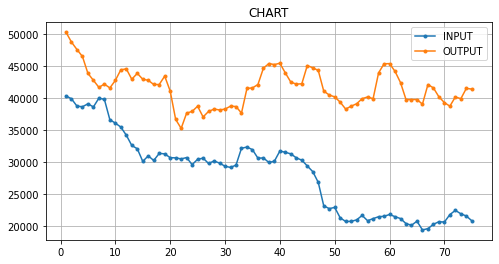

In [6]:
from Neuraline.ArtificialIntelligence.MachineLearning.AutonomousLearning.arima import ARIMA
sarima = ARIMA()

sarima.fit(inputs=y_training, p=116, d=0, q=10, seasonality=8, adjust=-80000)
result = sarima.predict(predictions=116)
chart.plotMATRIX(matrix1=y_test[:75], matrix2=result[:75])